___
# PROJETO 1

## <font color='red'>Yago Ribeiro Labate</font>
___

## <font color='blue'>Diferença de renda entre aposentados do Nordeste e do Sudeste</font>

## Introdução

O primeiro projeto de Ciencias dos Dados direciona o aluno a comparar um grupo de aposentados com algum outro grupo. Isso permite ao aluno trabalhar com uma alta variedade de assuntos, tendo em vista a diversidade de informações prensentes nos bancos de dados. Porém eu escolhi trabalhar com dois grupos de aposentados, os do Sudeste e os do Nordeste.

Durante as aulas de história no Ensimo Médio, eu aprendi que o Nordeste demorou mais para se desenvoler economicamente do que o Sudeste. Segundo uma matéria publicada no site "http://www.scielo.br/", "... até os anos 50 a economia nordestina acomodava-se lentamente às transformações na economia brasileira". A partir disso, eu fiquei curioso em saber se o atraso econômico daquela época refletiu sobre os aposentados de atualmente, uma vez que os mesmos viveram nessa época.

___
## Análise e Resultados

In [3]:
%matplotlib inline
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Yago\Desktop\Faculdade\2 Semestre\Ciencia dos dados\Projeto 1


In [5]:
#Leitura da base já em formato de DataFrame e extensão .csv, como também já filtrada com as variáveis que eu selecionei
dados = pd.read_csv('DadosProjeto1.cvs', sep=',', encoding='latin-1')

In [6]:
#Códigos que fazem possível o acesso das colunas do DataFrame cujos nomes apresentam espaços e barras

cols = dados.columns
cols = cols.map(lambda x: x.replace(' ', '_') if isinstance(x, (str, np.unicode)) else x)
dados.columns = cols

cols2 = dados.columns
cols2 = cols2.map(lambda x: x.replace('/', '_') if isinstance(x, (str, np.unicode)) else x)
dados.columns = cols2

___

In [7]:
dados.head()

,Unnamed:_0,Condição_de_Atividade,Cor_Raça,Idade,Nível_de_instrução_mais_elevado,Número_de_componentes_na_família,Região,Renda,Rendimento_de_Aposentadoria,Trabalhou_na_semana_de_referência
0,2,Economicamente Ativa,Branca,65,Fundamental incompleto ou equivalente,2.0,Norte,2362.0,724.0,Sim
1,4,Não Economicamente Ativa,Preta,90,Sem instrução,5.0,Norte,444.0,724.0,Não
2,6,Economicamente Ativa,Branca,65,Médio completo ou equivalente,2.0,Norte,2862.0,724.0,Sim
3,10,Não Economicamente Ativa,Parda,62,Fundamental incompleto ou equivalente,2.0,Norte,1321.0,724.0,Não
4,11,Economicamente Ativa,Parda,71,Fundamental incompleto ou equivalente,2.0,Norte,762.0,724.0,Sim


** Comparação da Renda dos aposentados do Nordeste e do Sudeste **

In [8]:
dados.Renda = dados.Renda[(dados.Renda!=999999999999) & (~dados.Renda.isnull())]


Boxplot da renda dos aposentados do Nordeste e do Sudeste


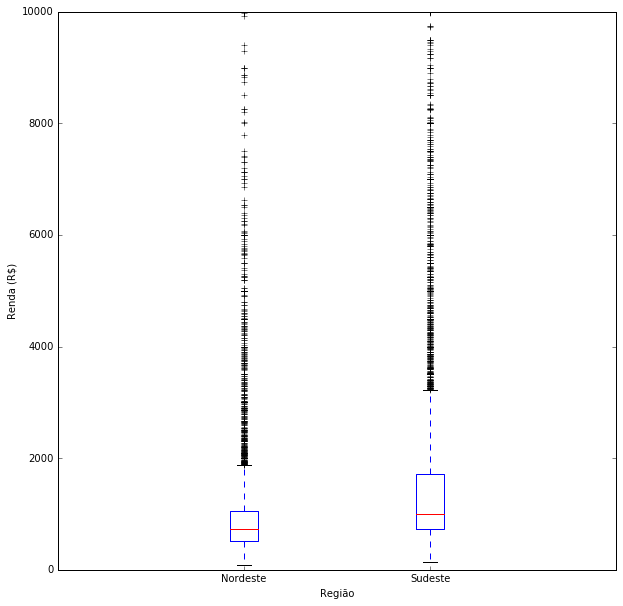

In [57]:
#Boxplot da renda dos aposentados do Nordeste e do Sudeste

print()
print('Boxplot da renda dos aposentados do Nordeste e do Sudeste')

Renda_Aposentados_Sudeste_E_Nordeste = pd.DataFrame([dados.Renda[dados.Região=='Nordeste'],dados.Renda[dados.Região=='Sudeste']])
Renda_Aposentados_Sudeste_E_Nordeste = Renda_Aposentados_Sudeste_E_Nordeste.T
plot = Renda_Aposentados_Sudeste_E_Nordeste.plot.box(figsize = (10,10))
plt.xticks([1, 2], ['Nordeste','Sudeste'])
plt.axis([0, 3, 0, 10000])
plt.xlabel("Região")
plt.ylabel("Renda (R$)")

In [58]:
#Código para transformar os valores em porcentagem
def percConvert(tab):
  return (tab/float(tab[-1])*100).round(decimals=0)

faixa = range(0,5500,500)
Renda = pd.cut(dados.Renda,faixa)

#Tabela da das rendas dos aposentados por cada região

print()
print('Tabela da das rendas dos aposentados por cada região')

Crosstab1 =pd.crosstab(Renda,dados.Região,margins=True,rownames=['Renda em reais'], colnames=['Região']).apply(percConvert, axis=1)
Crosstab1 = Crosstab1.iloc[(0,1,2,3,4,5,6,7,8,9),(1,3)]
Crosstab1



Tabela da das rendas dos aposentados por cada região


Região,Nordeste,Sudeste
Renda em reais,,
"(0, 500]",40.0,26.0
"(500, 1000]",30.0,31.0
"(1000, 1500]",18.0,39.0
"(1500, 2000]",15.0,42.0
"(2000, 2500]",15.0,40.0
"(2500, 3000]",14.0,47.0
"(3000, 3500]",14.0,42.0
"(3500, 4000]",18.0,38.0
"(4000, 4500]",16.0,40.0



Gráfico da renda dos aposentados de cada região


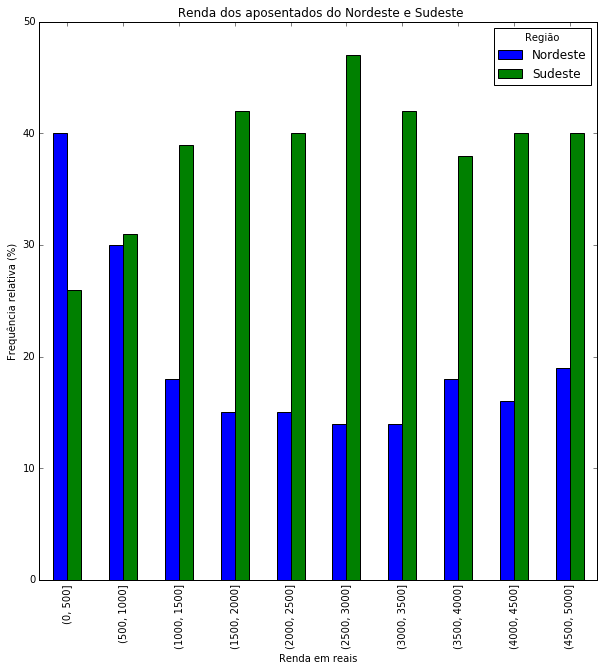

In [59]:
#Gráfico da renda dos aposentados de cada região

print()
print('Gráfico da renda dos aposentados de cada região')

plot = Crosstab1.plot(kind='bar',title=' Renda dos aposentados do Nordeste e Sudeste',figsize=(10, 10),color=('b','g'))
plt.ylabel('Frequência relativa (%)')

**  A partir da tabela e dos gráficos de boxplot e barra, pode-se concluir que a renda dos homens aposentados do Sudeste é maior do que a dos homens aposentados do Nordeste. Isso pode ser obsevado pelo fato da renda do Sudeste estar concentrada em intervalos de maiores valores do que a renda do Nordeste. **

## Possíveis explicações para a renda dos aposentados  do Sudeste ser maior que a dos do Nordeste:

**Idade:**

In [29]:
faixa2 = range(11,118,10)
Idades = pd.cut(dados.Idade,faixa2)

#Tabela que compara a idade dos aposentados por cada região

print()
print('Tabela da idade dos aposentados de cada região')

Crosstab2 =pd.crosstab(Idades,dados.Região,margins=True,rownames=['Faixa de idade'], colnames=['Porcentagem de aposentados em cada Região']).apply(percConvert, axis=0)
Crosstab2 = Crosstab2.iloc[(0,1,2,3,4,5,6,8,9),(1,3)]
Crosstab2


Tabela da idade dos aposentados de cada região


Porcentagem de aposentados em cada Região,Nordeste,Sudeste
Faixa de idade,,
"(11, 21]",0.0,0.0
"(21, 31]",1.0,0.0
"(31, 41]",1.0,1.0
"(41, 51]",4.0,4.0
"(51, 61]",16.0,21.0
"(61, 71]",42.0,41.0
"(71, 81]",26.0,24.0
"(91, 101]",1.0,1.0
"(101, 111]",0.0,0.0


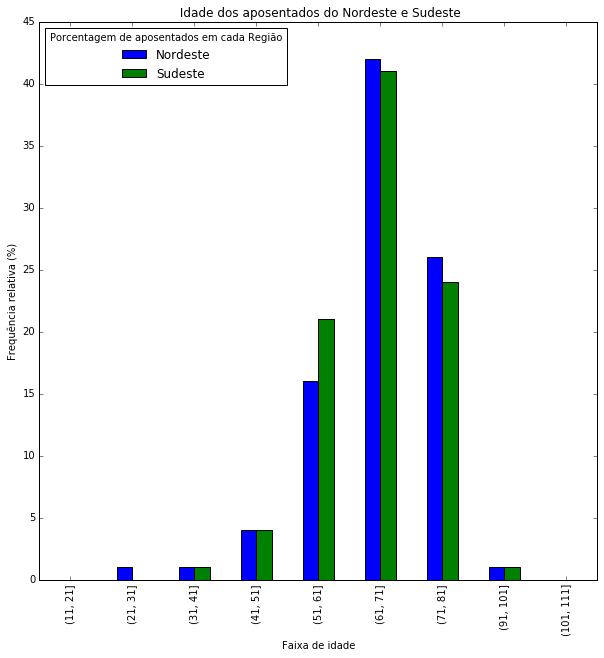

In [61]:
#Gráfico que compara a idade dos aposentados por cada região

plot = Crosstab2.plot(kind='bar',title=' Idade dos aposentados do Nordeste e Sudeste',figsize=(10, 10),color=('b','g'))
plt.ylabel('Frequência relativa (%)')


Histograma das idades dos aposentados de cada região


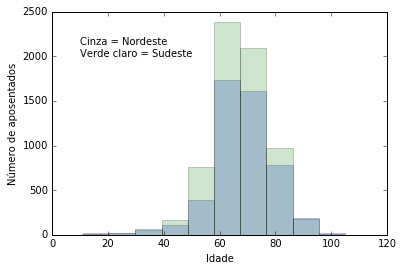

In [35]:
#Histograma das idades dos aposentados de cada região

print()
print('Histograma das idades dos aposentados de cada região')

Idades_Aposentados_Sudeste_E_Nordeste = pd.DataFrame([dados.Idade[dados.Região=='Nordeste'],dados.Idade[dados.Região=='Sudeste']])
Idades_Aposentados_Sudeste_E_Nordeste = Idades_Aposentados_Sudeste_E_Nordeste.T
Idades_Aposentados_Sudeste_E_Nordeste.plot.hist(color = ('b','g'), alpha = 0.2, legend = '')
plt.xlabel('Idade')
plt.ylabel('Número de aposentados')
plt.text(10,2000,'Cinza = Nordeste \nVerde claro = Sudeste')




Boxplot das idades dos aposentados de cada região


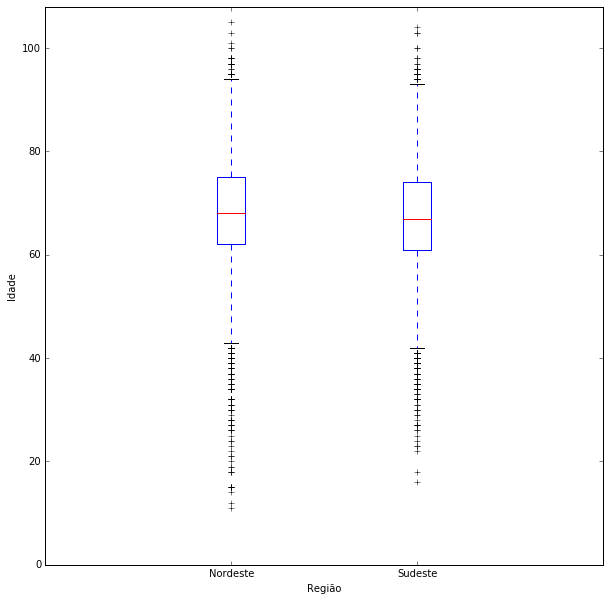

In [36]:
#Boxplot da idade dos aposentados de cada região

print()
print('Boxplot das idades dos aposentados de cada região')

plot = Idades_Aposentados_Sudeste_E_Nordeste.plot.box(figsize = (10,10))
plt.xticks([1, 2], ['Nordeste','Sudeste'])
plt.axis([0, 3, 0, 108])
plt.ylabel('Idade')
plt.xlabel('Região')

** A partir da tabela e dos gráficos analisados, pode-se concluir que a idade dos aposentados de ambas as regões são muito semelhantes, o que indica que, provavelmente, isso não terá impacto na diferença de rendas.**

** Agora serão feitos gráficos de dispersão e correlações entre os dados para que a suposição acima possa ser comprovada:**


Gráfico de dispersão das idades dos aposentados do nordeste


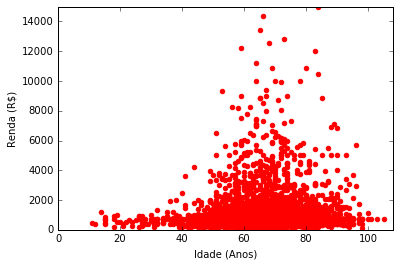

In [75]:
#Gráfico de dispersão da idade e da renda, ambos dos aposentados do Nordeste

print()
print('Gráfico de dispersão das idades dos aposentados do nordeste')

plt.scatter(dados.Idade[dados.Região=='Nordeste'],dados.Renda[dados.Região=='Nordeste'], color = 'red')
plt.axis([0,108,0,15000])
plt.ylabel('Renda (R$)')
plt.xlabel('Idade (Anos)')


Gráfico de dispersão das idades dos aposentados do Sudeste


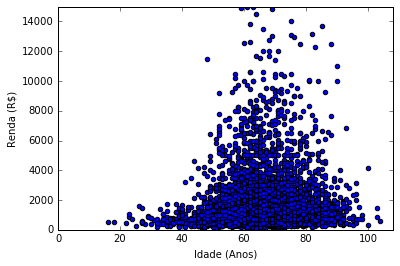

In [43]:
#Gráfico de dispersão da idade e da renda, ambos dos aposentados do Sudeste

print()
print('Gráfico de dispersão das idades dos aposentados do Sudeste')

plt.scatter(dados.Idade[dados.Região=='Sudeste'],dados.Renda[dados.Região=='Sudeste'])
plt.axis([0,108,0,15000])
plt.ylabel('Renda (R$)')
plt.xlabel('Idade (Anos)')

In [46]:
#Correlações entre a idade e a renda dos aposentados de cada região

print('Correlação entre a idade e a renda dos aposentados do Nordeste:')
print('->',dados.Idade[dados.Região=='Nordeste'].corr(dados.Renda[dados.Região=='Nordeste']))

print()

print('Correlação entre a idade e a renda dos aposentados do Sudeste:')
print('->',dados.Idade[dados.Região=='Sudeste'].corr(dados.Renda[dados.Região=='Sudeste']))


Correlação entre a idade e a renda dos aposentados do Nordeste:
-> 0.0168069941673

Correlação entre a idade e a renda dos aposentados do Sudeste:
-> 0.00199436038887


Gráfico de dispersão com a reta de tendência para os aposentados do Nordeste

Coeficiente angular a:  2.45191795999
Coeficiente linear b:  943.340123983


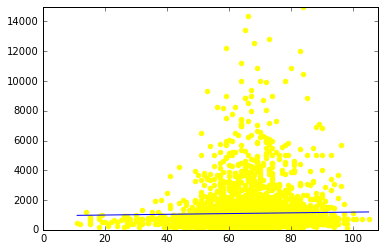

In [92]:
def scatter_and_line(column1, column2):
    #Recebe duas colunas, e faz o scatterplot dos dois e tenta achar a reta de tendência
    
    a = column1.cov(column2) / column1.var()
    b = column2.mean() - a * column1.mean()

    

    import matplotlib.pyplot as plt
    plt.plot((column1.min(), column1.max()), (a * column1.min() + b, a * column1.max() + b), color='blue')
    plt.scatter(column1,column2,color='yellow')
    plt.axis([0,108,0,15000])
    
    print("Coeficiente angular a: ", a)
    print("Coeficiente linear b: ", b)

print('Gráfico de dispersão com a reta de tendência para os aposentados do Nordeste')   
print()

scatter_and_line(dados.Idade[dados.Região=='Nordeste'], dados.Renda[dados.Região=='Nordeste'])

Gráfico de dispersão com a reta de tendência para os aposentados do Nordeste

Coeficiente angular a:  0.898986726855
Coeficiente linear b:  1644.40363017


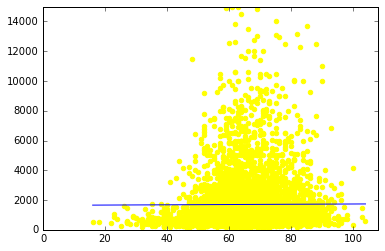

In [93]:
print('Gráfico de dispersão com a reta de tendência para os aposentados do Nordeste')   
print()

scatter_and_line(dados.Idade[dados.Região=='Sudeste'], dados.Renda[dados.Região=='Sudeste'])


**A partir da análise dos gráficos e das correlações feitos, conclui-se, de fato, que a idade dos aposentados não interfere em sua renda**

**Estudos:**

In [62]:
#Tabela do nível de instrução para cada região

print()
print('Tabela do nível de instrução para cada região')

Crosstab3 =pd.crosstab(dados.Nível_de_instrução_mais_elevado,dados.Região,margins=True,rownames=['Nível de Instrução'], colnames=['Região']).apply(percConvert, axis=0)
Crosstab3 = Crosstab3.iloc[(0,1,2,3,4,5,6,7),(1,3)]
Crosstab3


Tabela do nível de instrução para cada região


Região,Nordeste,Sudeste
Nível de Instrução,,
Fundamental completo ou equivalente,6.0,9.0
Fundamental incompleto ou equivalente,33.0,45.0
Médio completo ou equivalente,11.0,15.0
Médio incompleto ou equivalente,1.0,2.0
Não determinado,0.0,0.0
Sem instrução,43.0,15.0
Superior completo,6.0,12.0
Superior incompleto ou equivalente,1.0,2.0



Gráfico do nível de instrução para cada região


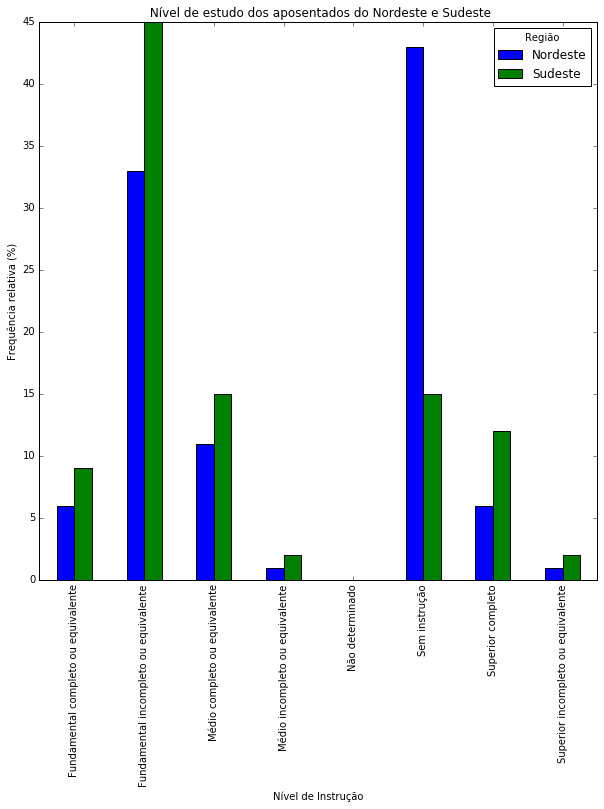

In [63]:
# Gráfico do nível de instrução para cada região

print()
print('Gráfico do nível de instrução para cada região')

plot = Crosstab3.plot(kind='bar',title=' Nível de estudo dos aposentados do Nordeste e Sudeste',figsize=(10, 10),color=('b','g'))
plt.ylabel('Frequência relativa (%)')

** Segundo o gráfico e a tabela, é possível notar que o nível de instrução dos homens do Nordeste é menor/pior do que os do Sudeste. Portanto pode-se dizer que, no mínimo, os aposentados de 2014 do Sudeste ingressaram no mercado de trabalho mais preparados do que os do Nordeste, o que pode ser um dos motivos dessa diferença de renda **   

** Número de componentes na família: **

    A variável "Número de componentes na família" foi escolido pelo fato de poder estar relacionada com a renda. Segundo uma matéria publicada pelo site "http://www.diariodonordeste.verdesmares.com.br/", "Família de baixa renda tem mais filhos". A partir disso, esse dado será analisado para auxiliar a pesquisa.


Boxplot do número de componentes na família dos aposentados de cada região


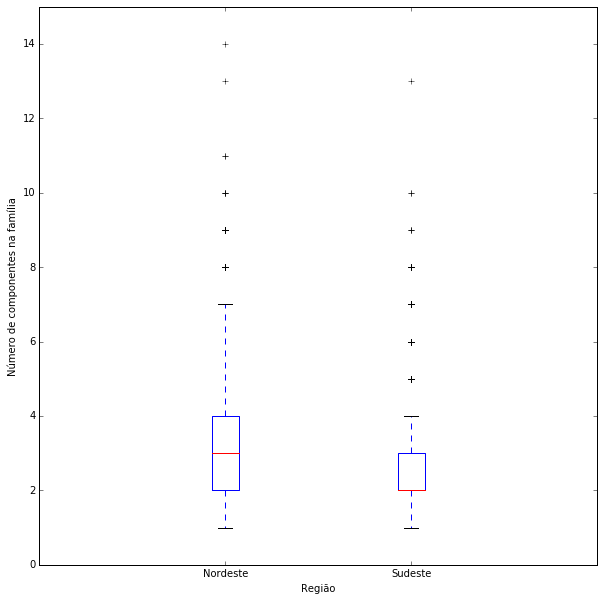

In [64]:
#Boxplot do número de componentes na família dos aposentados de cada região

print()
print('Boxplot do número de componentes na família dos aposentados de cada região')

Componentes_Aposentados_Sudeste_E_Nordeste = pd.DataFrame([dados.Número_de_componentes_na_família[dados.Região=='Nordeste'],dados.Número_de_componentes_na_família[dados.Região=='Sudeste']])
Componentes_Aposentados_Sudeste_E_Nordeste = Componentes_Aposentados_Sudeste_E_Nordeste.T
plot = Componentes_Aposentados_Sudeste_E_Nordeste.plot.box(figsize = (10,10))
plt.xticks([1, 2], ['Nordeste','Sudeste'])
plt.axis([0, 3, 0, 15])
plt.ylabel('Número de componentes na família')
plt.xlabel('Região')

In [65]:
faixa3 = range(0,16,1)
Componentes = pd.cut(dados.Número_de_componentes_na_família,faixa3)

#Tabela que compara o número de componentes na família dos aposentados por cada região

print()
print('Tabela que compara o número de componentes na família dos aposentados por cada região')

Crosstab4 =pd.crosstab(Componentes,dados.Região,margins=True,rownames=['Número de componentes na família'], colnames=['Região']).apply(percConvert, axis=0)
Crosstab4 = Crosstab4.iloc[(0,1,2,3,4,5,6,8,9,10,11,12,13,14),(1,3)]
Crosstab4


Tabela que compara o número de componentes na família dos aposentados por cada região


Região,Nordeste,Sudeste
Número de componentes na família,,
"(0, 1]",11.0,12.0
"(1, 2]",35.0,42.0
"(2, 3]",27.0,26.0
"(3, 4]",15.0,13.0
"(4, 5]",7.0,4.0
"(5, 6]",3.0,1.0
"(6, 7]",1.0,1.0
"(8, 9]",0.0,0.0
"(9, 10]",0.0,0.0



Gráfico que compara o número de componentes na família dos aposentados por cada região


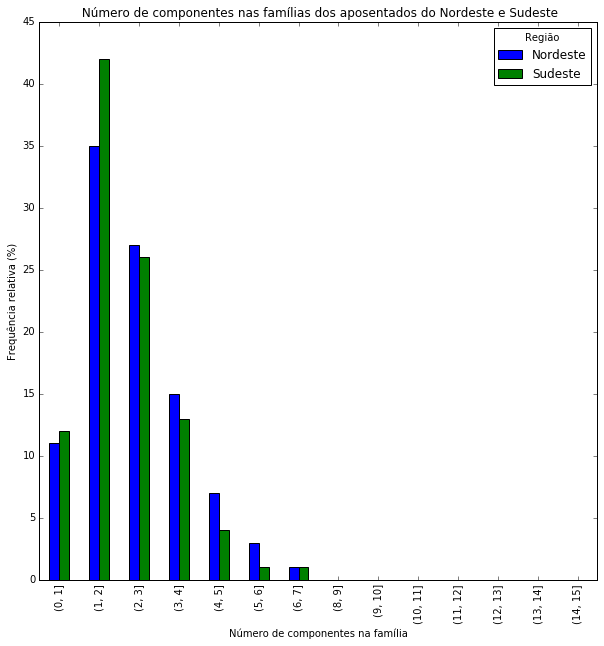

In [66]:
#Gráfico que compara o número de componentes na família dos aposentados por cada região

print()
print('Gráfico que compara o número de componentes na família dos aposentados por cada região')

plot = Crosstab4.plot(kind='bar',title=' Número de componentes nas famílias dos aposentados do Nordeste e Sudeste',figsize=(10, 10),color=('b','g'))
plt.ylabel('Frequência relativa (%)')

** Segundo o gráfico e a tabela, apesar do número de componentes nas famílias dos aposentados do Nordeste serem um pouco maior do que os do Sudeste, não é possível concluir que haja uma relação entre as variáveis 'Renda' e 'Número de componentes na família'. Dessa forma, será feito um gráfico de dispersão e uma correlação para comprovar isso**


Gráfico de dispersão do número de componentes da família e da renda, ambos dos aposentados do Nordeste


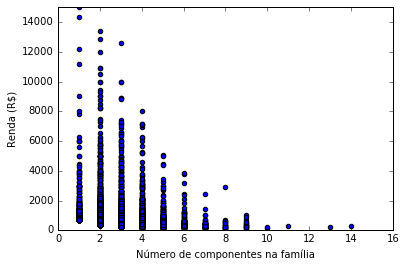

In [67]:
#Gráfico de dispersão do número de componentes da família e da renda, ambos dos aposentados do Nordeste

print()
print('Gráfico de dispersão do número de componentes da família e da renda, ambos dos aposentados do Nordeste')

plt.scatter(dados.Número_de_componentes_na_família[dados.Região=='Nordeste'],dados.Renda[dados.Região=='Nordeste'])
plt.axis([0,16,0,15000])
plt.ylabel('Renda (R$)')
plt.xlabel('Número de componentes na família')


Gráfico de dispersão do número de componentes da família e da renda, ambos dos aposentados do Sudeste


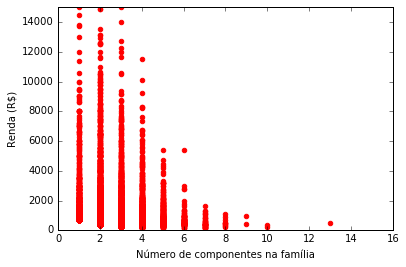

In [68]:
#Gráfico de dispersão do número de componentes da família e da renda, ambos dos aposentados do Sudeste

print()
print('Gráfico de dispersão do número de componentes da família e da renda, ambos dos aposentados do Sudeste')

plt.scatter(dados.Número_de_componentes_na_família[dados.Região=='Sudeste'],dados.Renda[dados.Região=='Sudeste'], color = 'Red')
plt.axis([0,16,0,15000])
plt.ylabel('Renda (R$)')
plt.xlabel('Número de componentes na família')

In [23]:
#Correlações entre o número de componentes na família e a renda dos aposentados de cada região

print('Correlação entre o número de componentes na família e a renda dos aposentados do Nordeste:')
print('->',dados.Número_de_componentes_na_família[dados.Região=='Nordeste'].corr(dados.Renda[dados.Região=='Nordeste']))

print()

print('Correlação entre o número de componentes na família e a renda dos aposentados do Sudeste:')
print('->',dados.Número_de_componentes_na_família[dados.Região=='Sudeste'].corr(dados.Renda[dados.Região=='Sudeste']))


Correlação entre o número de componentes na família e a renda dos aposentados do Nordeste:
-> -0.143625620453

Correlação entre o número de componentes na família e a renda dos aposentados do Sudeste:
-> -0.0812133300114


Gráfico de dispersão com a reta de tendência para os aposentados do Nordeste

Coeficiente angular a:  -162.595699125
Coeficiente linear b:  1581.46697041


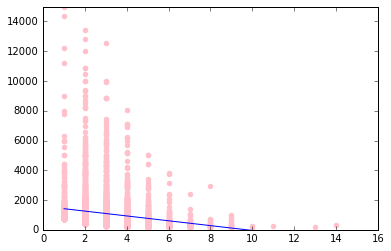

In [97]:
def scatter_and_line2(column1, column2):
    #Recebe duas colunas, e faz o scatterplot dos dois e tenta achar a reta de tendência
    
    a = column1.cov(column2) / column1.var()
    b = column2.mean() - a * column1.mean()

    

    import matplotlib.pyplot as plt
    plt.plot((column1.min(), column1.max()), (a * column1.min() + b, a * column1.max() + b), color='blue')
    plt.scatter(column1,column2,color='pink')
    plt.axis([0,16,0,15000])
    
    print("Coeficiente angular a: ", a)
    print("Coeficiente linear b: ", b)

print('Gráfico de dispersão com a reta de tendência para os aposentados do Nordeste')   
print()

scatter_and_line2(dados.Número_de_componentes_na_família[dados.Região=='Nordeste'], dados.Renda[dados.Região=='Nordeste'])

Gráfico de dispersão com a reta de tendência para os aposentados do Sudeste

Coeficiente angular a:  -322.313808266
Coeficiente linear b:  2554.7625495


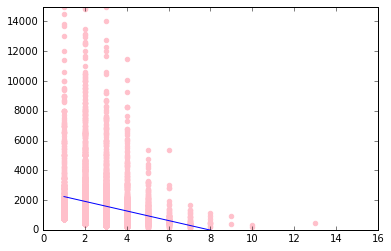

In [98]:
print('Gráfico de dispersão com a reta de tendência para os aposentados do Sudeste')   
print()

scatter_and_line2(dados.Número_de_componentes_na_família[dados.Região=='Sudeste'], dados.Renda[dados.Região=='Sudeste'])

** Para ambos os casos, Nordeste e Sudeste, a Correlação entre os dados é fraca, o que indica que não se pode tirar grandes conclusões sobre o efeito do número de componentes na família na renda. **

**Agora serão analisadas as variáveis "Trabalhou na semana de referencia" e "Condição de Atividade", seguido por uma comparação da renda e do rendimento de aposentadoria**. 
    
    Os resultados das primeiras duas variáveis mostrará a quantidade de aposentados que ainda trabalham, já as outras duas serão um reflexo das duas primeiras, uma vez que se houver trababalho por parte dos aposentados, a renda deles será relativamente maior do que o rendimento de aposentadoria.

** Trabalhou na Semana de Referencia e Condição de Atividade:**

In [71]:
#Tabelas de comparação entre as variáveis "Trabalhou na semana de referência" e "Condição de atividade", respectivamente, 
#com as Regiões.

print()
print('Tabelas de comparação entre as variáveis "Trabalhou na semana de referência" e "Condição de atividade",\n respectivamente, com as Regiões')
print()

Crosstab5 =pd.crosstab(dados.Trabalhou_na_semana_de_referência,dados.Região,margins=True,rownames=['Trabalhou na semana de referência:'], colnames=['Região']).apply(percConvert, axis=0)
Crosstab5 = Crosstab5.iloc[(0,1),(1,3)]
print(Crosstab5)

print()
print() 

Crosstab6 =pd.crosstab(dados.Condição_de_Atividade,dados.Região,margins=True,rownames=['Condição de Atividade:'], colnames=['Região']).apply(percConvert, axis=0)
Crosstab6 = Crosstab6.iloc[(0,1),(1,3)]
print(Crosstab6)


Tabelas de comparação entre as variáveis "Trabalhou na semana de referência" e "Condição de atividade",
 respectivamente, com as Regiões

Região                              Nordeste  Sudeste
Trabalhou na semana de referência:                   
Não                                     71.0     75.0
Sim                                     29.0     25.0


Região                     Nordeste  Sudeste
Condição de Atividade:                      
 Não Economicamente Ativa      65.0     71.0
Economicamente Ativa           35.0     29.0


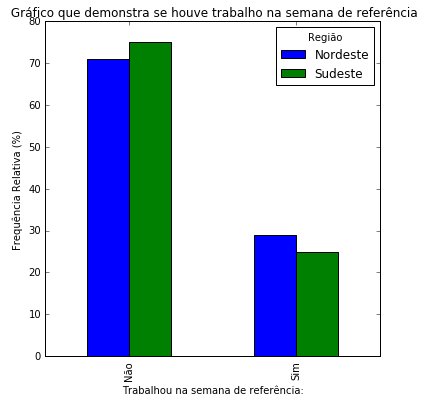

In [25]:
#Gráfico que demonstra se houve trabalho ou não na semana de referência


plot = Crosstab5.plot(kind='bar',title=' Gráfico que demonstra se houve trabalho na semana de referência',figsize=(6, 6),color=('b','g'))
plt.ylabel('Frequência Relativa (%)')

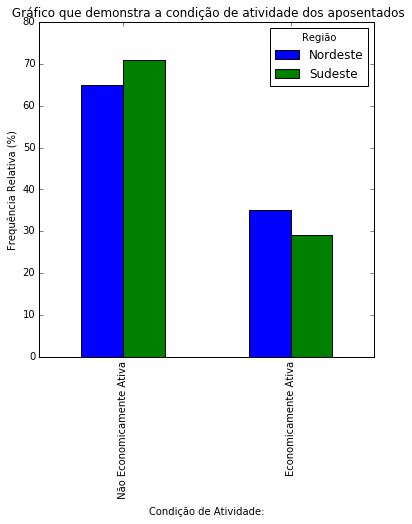

In [26]:
#Gráfico que demonstra a condição de atividade dos aposentados

plot = Crosstab6.plot(kind='bar',title=' Gráfico que demonstra a condição de atividade dos aposentados',figsize=(6, 6),color=('b','g'))
plt.ylabel('Frequência Relativa (%)')

**Os resultados dos gráficos demonstram um comportamento muito semelhante entre as duas regiões, já que o número de aposentados economicamente ativos do Nordeste e do Sudeste, assim como o de que trabalharam na semana de referência são quase equivalentes.**

**Renda x Rendimento de aposentadoria:**


Boxplot da renda e do rendimento de aposentadoria para cada uma das regiões


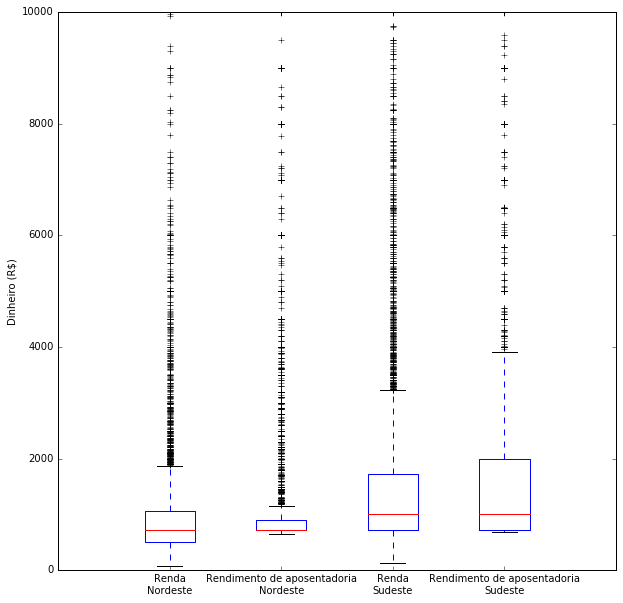

In [99]:
#Boxplot da renda e do rendimento de aposentadoria para cada uma das regiões

print()
print('Boxplot da renda e do rendimento de aposentadoria para cada uma das regiões')

Renda_X_Aposentadoria = pd.DataFrame([dados.Renda[dados.Região=='Nordeste'],dados.Rendimento_de_Aposentadoria[dados.Região=='Nordeste'],dados.Renda[dados.Região=='Sudeste'],dados.Rendimento_de_Aposentadoria[dados.Região=='Sudeste']])
Renda_X_Aposentadoria = Renda_X_Aposentadoria.T
plot = Renda_X_Aposentadoria.plot.box(figsize = (10,10))
plt.xticks([1, 2,3,4], ['Renda' '\n' 'Nordeste','Rendimento de aposentadoria' '\n' 'Nordeste','Renda' '\n' 'Sudeste','Rendimento de aposentadoria' '\n' 'Sudeste'])
plt.axis([0, 5, 0, 10000])
plt.ylabel('Dinheiro (R$)')

** Os resultados do gráfico acima condizem com os resultados das tabelas anteriores, uma vez que se a maioria não é economicamnte ativa e não trabalha, a renda não será muito maior do que o rendimento de aposentadoria**

___
## Conclusão 

   A partir dos dados analisados, pode-se concluir que a razão da diferença de rendas entre os aposentados do Sudeste e do Nordeste se deve ao nível de instrução deles. Como analisado nos gráficos, o nível de instrução dos aposentados do Sudeste é mais elevado do que os do Nordeste, o que significa mais oportunidades de trabalho e, consequentemente, mais renda.
    
   As outras variáveis não mostraram ter grande influência na diferença presente entre as rendas, o que impossibilita concluir algo a partir delas: 
    
      - As variáveis "Trabalhou na Semana de Referencia" e "Condição de Atividade" se mostraram muito semelhantes em seus resultados, nos quais demonstram que, em ambas regiões, aproximadamente 30% dos aposentados é economicamente ativo e trabalha. Tais resultados refletiram na análise da comparação entre a renda o rendimento de aposentadoria, uma vez que se a maioria não trabalha, a diferença entre essas últimas variáveis é pequena.
    
      - As variáveis "Idade" e "Número de componentes na família" também não se mostraram eficientes, uma vez que não foi possível estabeler nehuma relação entre elas e a renda.